# Домашняя работа 2

В этой доамшней работе вам предлагается обучить классификатор, распознающий вид блюда по фотографии. Прямо как на семинаре, только больше разной еды!

 # Home Work 2

In this hw assignment you have to train a classifier to distinguish between different food variations. Just like at our practice, but with more foods variety!

## Но сперва... Теория
Необходимо решить теоретические задачи, используя Latex, внутри этого ноутбука
## But first... Theory
Solve the theoretical problems. Type the solutions here, using Latex

### Задача 1 (2 балла)
### Problem 1 (2 points)

Посчитайте результат применения операции свертки с ядром K к матрице X. Параметры свертки следующие: stride=2, dilation=2, padding=1 (паддинг осуществляется нулями).

Compute the result of convolution operation with kernel K to a matrix X.
Convolution params are: stride=2, dilation=2, padding=1 (padding with zeros)


$        X = \begin{bmatrix}
        1 & 0 & -4 & 2 \\
        5 & 2 & 3 & 0 \\
        -1 & 0 & 1 & 4 \\
        0 & -3 & 2 & -1
    \end{bmatrix}
    K = \begin{bmatrix}
        2 & 1 \\
        -1 & -2
    \end{bmatrix}
$

#### Решение  ================= Solution

#### Шаг 1: Дополнение нулями

Паддинг 1 вокруг матрицы $X$:

$$
X_{\text{padded}} = \begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & -4 & 2 & 0 \\
0 & 5 & 2 & 3 & 0 & 0 \\
0 & -1 & 0 & 1 & 4 & 0 \\
0 & 0 & -3 & 2 & -1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
$$

#### Шаг 2: Свёртка с dilation=2

dilation=2 увеличивает расстояние между элементами ядра:
- Индексы ядра по $X$:  
  $$
  \begin{bmatrix}
  (0,0) & (0,2) \\
  (2,0) & (2,2)
  \end{bmatrix}
  $$

---

#### Шаг 3: Вычисление выходной размерности

С учётом:
- вход $6 \times 6$
- kernel\_eff $3 \times 3$
- stride = 2

Формула:  
$$
\text{output size} = \left\lfloor \frac{(6 - 3)}{2} \right\rfloor + 1 = 2
$$

Выход: $2 \times 2$

---

#### Шаг 4: Ручной расчёт свёртки

##### Позиция (0,0):

Взятая область:
$$
\begin{bmatrix}
0 & 0 & 0 \\
0 & 1 & 0 \\
0 & 5 & 2
\end{bmatrix}
$$

Применим ядро с dilation:

$$
0 \cdot 2 + 0 \cdot 1 + 0 \cdot (-1) + 2 \cdot (-2) = -4
$$

##### Позиция (0,1):

Левый верхний угол окна: (0,2)

Взятая область:
$$
\begin{bmatrix}
0 & 0 & 0 \\
-4 & 2 & 0 \\
3 & 0 & 0
\end{bmatrix}
$$

$$
0 \cdot 2 + 0 \cdot 1 + 3 \cdot (-1) + 0 \cdot (-2) = -3
$$

##### Позиция (1,0):

Левый верхний угол окна: (2,0)

$$
\begin{bmatrix}
0 & 5 & 2 \\
0 & -1 & 0 \\
0 & 0 & -3
\end{bmatrix}
$$

$$
0 \cdot 2 + 2 \cdot 1 + 0 \cdot (-1) + (-3) \cdot (-2) = 2 + 6 = 8
$$

##### Позиция (1,1):

Левый верхний угол окна: (2,2)

$$
\begin{bmatrix}
2 & 3 & 0 \\
1 & 4 & 0 \\
2 & -1 & 0
\end{bmatrix}
$$

$$
2 \cdot 2 + 0 \cdot 1 + 2 \cdot (-1) + 0 \cdot (-2) = 4 - 2 = 2
$$

---

### Ответ:

Результат свёртки:

$$
\begin{bmatrix}
-4 & -3 \\
8 & 2
\end{bmatrix}
$$


### Задача 2 (2 балла)
### Problem 2 (2 points)

Посчитайте число обучаемых параметров в нейронной сети, архитектура которой выглядит следующим образом:

        model = nn.Sequential(
            nn.Conv2d(
                in_channels=3, out_channels=16, kernel_size=5,
                stride=2, padding=0, dilation=1, bias=True
            ),
            nn.BatchNorm2d(num_features=16),
            nn.LeakyReLU(0.1),
            nn.Conv2d(
                in_channels=16, out_channels=32, kernel_size=5,
                stride=1, padding=1, dilation=2, bias=False
            ),
            nn.BatchNorm2d(num_features=32),
            nn.Sigmoid(),
        )
  

#### Решение =================== Solution

Вам необходимо расписать решение формулами

You need to justify every step

### Решение / Solution

Нужно посчитать **число обучаемых параметров** (weights + biases) для всех слоёв, где параметры есть:

- `nn.Conv2d` (имеет обучаемые веса и, опционально, bias)  
- `nn.BatchNorm2d` (имеет γ и β — scale и shift параметры)

Функции активации (`LeakyReLU`, `Sigmoid`) не содержат обучаемых параметров, так что их можно пропустить.

---

### Первый слой: `nn.Conv2d(3, 16, kernel_size=5, stride=2, padding=0, dilation=1, bias=True)`

Параметры сверточного слоя:

$$
\text{Параметры} = C_{\text{out}} \cdot C_{\text{in}} \cdot K_H \cdot K_W + C_{\text{out}} \cdot \mathbb{1}_{\text{bias}}
$$

Подставим значения:

$$
= 16 \cdot 3 \cdot 5 \cdot 5 + 16 = 1200 + 16 = \boxed{1216}
$$

---

### Второй слой: `nn.BatchNorm2d(16)`

BatchNorm2d имеет 2 обучаемых параметра на канал: γ и β.

$$
2 \cdot 16 = \boxed{32}
$$

---

### Третий слой: `nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=1, dilation=2, bias=False)`

Bias отключён, считаем только веса:

$$
32 \cdot 16 \cdot 5 \cdot 5 = 32 \cdot 16 \cdot 25 = \boxed{12800}
$$

---

### Четвёртый слой: `nn.BatchNorm2d(32)`

$$
2 \cdot 32 = \boxed{64}
$$

---

### Суммируем:

$$
\text{Total} = 1216 + 32 + 12800 + 64 = \boxed{14112}
$$

---

### Ответ:

$$
\boxed{14112\ \text{обучаемых параметров}}
$$


### Практическое задание
### Practical problem

Вам необходимо решить задачу многоклассовой классификации для датасета Food101

Solve multicalss classification problem for Food101 dataset

####  Служебный код

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "9"  
import shutil
from typing import Dict, List, Tuple
from pathlib import Path
from urllib.request import urlretrieve

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from tqdm.auto import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.optim.lr_scheduler import CosineAnnealingLR

from torchvision import datasets, transforms, models
from torch.utils.data import random_split, DataLoader

torch.manual_seed(42)
torch.cuda.manual_seed(42)

try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

pd.set_option('display.max_colwidth', None)

In [2]:
class TqdmUpTo(tqdm):
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)


def download_url(url, filepath):
    directory = os.path.dirname(os.path.abspath(filepath))
    os.makedirs(directory, exist_ok=True)
    if os.path.exists(filepath):
        print("Filepath already exists. Skipping download.")
        return

    with TqdmUpTo(unit="B", unit_scale=True, unit_divisor=1024, miniters=1, desc=os.path.basename(filepath)) as t:
        urlretrieve(url, filename=filepath, reporthook=t.update_to, data=None)
        t.total = t.n


def extract_archive(filepath):
    extract_dir = os.path.dirname(os.path.abspath(filepath))
    shutil.unpack_archive(filepath, extract_dir)

In [ ]:
dataset_directory = os.path.join(os.environ["HOME"], "datasets/food101")
data_path = Path(dataset_directory)
image_path = data_path / "food-101" / "images"

In [4]:
# filepath = os.path.join(dataset_directory, "food101.tar.gz")
# url = "http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz"
# download_url(
#     url=url,
#     filepath=filepath,
# )
# %time extract_archive(filepath)

### Dataloaders (1 point)


In [ ]:
def split_data(dataset, val_size=0.2, seed=42):
    generator = torch.Generator().manual_seed(seed)
    train_data, test_data = random_split(dataset, [1 - val_size, val_size], generator=generator)

    return train_data, test_data


def create_dataloaders(
    data_dir: str,
    transform: transforms.Compose,
    batch_size: int,
    num_workers: int,
):
  """Creates training and testing DataLoaders.

  Takes in a training directory and testing directory path and turns
  them into PyTorch Datasets and then into PyTorch DataLoaders.

  Args:
    train_dir: Path to training directory.
    test_dir: Path to testing directory.
    transform: torchvision transforms to perform on training and testing data.
    batch_size: Number of samples per batch in each of the DataLoaders.
    num_workers: An integer for number of workers per DataLoader.

  Returns:
    A tuple of (train_dataloader, test_dataloader, class_names).
    Where class_names is a list of the target classes.
    Example usage:
      train_dataloader, test_dataloader, class_names = \
        = create_dataloaders(train_dir=path/to/train_dir,
                             test_dir=path/to/test_dir,
                             transform=some_transform,
                             batch_size=32,
                             num_workers=4)
  """
  # Используйте ImageFolder для создания датасета или напишите свой класс
  dataset = datasets.ImageFolder(
    root=data_dir,
    transform=transform,
  )

  train_set, valid_test_set = split_data(dataset, val_size=0.4)
  valid_set, test_set = split_data(valid_test_set, val_size=0.5)

  # Get class names
  class_names = dataset.classes

  # Turn images into data loaders
  train_dataloader = DataLoader(
    train_set,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
  )
  valid_dataloader = DataLoader(
    valid_set,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
  )
  test_dataloader = DataLoader(
      test_set,
      batch_size=batch_size,
      shuffle=False,
      num_workers=num_workers,
  )


  return train_dataloader, valid_dataloader, test_dataloader, class_names

 #### Train function (2 points)


Напишите функцию трейна. Мы делали нечто похожее на семинаре

In [ ]:
def train_step(
  model: torch.nn.Module,
  dataloader: torch.utils.data.DataLoader,
  loss_fn: torch.nn.Module,
  optimizer: torch.optim.Optimizer,
  device: torch.device,
) -> Tuple[float, float]:
    
    model.train()

    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    
    return train_loss, train_acc

def valid_step(
  model: torch.nn.Module,
  dataloader: torch.utils.data.DataLoader,
  loss_fn: torch.nn.Module,
  device: torch.device,
) -> Tuple[float, float]:
    """valids a PyTorch model for a single epoch.

    Turns a target PyTorch model to "eval" mode and then performs
    a forward pass on a validing dataset.

    Args:
    model: A PyTorch model to be valided.
    dataloader: A DataLoader instance for the model to be valided on.
    loss_fn: A PyTorch loss function to calculate loss on the valid data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of validing loss and validing accuracy metrics.
    In the form (tes
    # Adjust metrics to get average loss and accuracy per batcht_loss, valid_accuracy). For example:

    (0.0223, 0.8985)
    """
    model.eval()

    valid_loss, valid_acc = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            valid_loss += loss.item()
            valid_pred_labels = y_pred.argmax(dim=1)
            valid_acc += (valid_pred_labels == y).sum().item()/len(valid_pred_labels)

    valid_loss = valid_loss / len(dataloader)
    valid_acc = valid_acc / len(dataloader)
    
    return valid_loss, valid_acc

def train(
  model: torch.nn.Module,
  train_dataloader: torch.utils.data.DataLoader,
  valid_dataloader: torch.utils.data.DataLoader,
  optimizer: torch.optim.Optimizer,
  loss_fn: torch.nn.Module,
  epochs: int,
  device: torch.device,
) -> Dict[str, List]:
    """Trains and valids a PyTorch model.

    Passes a target PyTorch models through train_step() and valid_step()
    functions for a number of epochs, training and validing the model
    in the same epoch loop.

    Calculates, prints and stores evaluation metrics throughout.

    Args:
    model: A PyTorch model to be trained and valided.
    train_dataloader: A DataLoader instance for the model to be trained on.
    valid_dataloader: A DataLoader instance for the model to be valided on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A dictionary of training and validing loss as well as training and
    validing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
              train_acc: [...],
              valid_loss: [...],
              valid_acc: [...]}
    For example if training for epochs=2:
             {train_loss: [2.0616, 1.0537],
              train_acc: [0.3945, 0.3945],
              valid_loss: [1.2641, 1.5706],
              valid_acc: [0.3400, 0.2973]}
    """

    results = {
      "train_loss": [],
      "train_acc": [],
      "valid_loss": [],
      "valid_acc": [],
      "lr": [],
    }

    model = model.to(device)

    scheduler = CosineAnnealingLR(
        optimizer,
        T_max=epochs,
        eta_min=1e-6
    )

    for epoch in tqdm(range(epochs)):
      train_loss, train_acc = train_step(
        model=model,
        dataloader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        device=device,
      )
      valid_loss, valid_acc = valid_step( 
        model=model,
        dataloader=valid_dataloader,
        loss_fn=loss_fn,
        device=device,
      )

      scheduler.step()
        
      # Сохраняем текущий lr
      current_lr = optimizer.param_groups[0]['lr']

      print(f"\nEpoch: {epoch+1}")
      print(f"LR: {current_lr:.2e}")
      print(f"Train Loss: {train_loss:.4f} | Acc: {train_acc:.4f}")
      print(f"valid Loss: {valid_loss:.4f} | Acc: {valid_acc:.4f}")
        

      results["train_loss"].append(train_loss)
      results["train_acc"].append(train_acc)
      results["valid_loss"].append(valid_loss)
      results["valid_acc"].append(valid_acc)
      results["lr"].append(current_lr)

      torch.save(
        {
          'epoch': epochs,
          'model_state_dict': model.state_dict(),
          'optimizer_state_dict': optimizer.state_dict(),
          'loss': loss_fn,
        },
        f"{epochs}_iter.pth",
      )
      if valid_acc > 0.95:
        return results

    return results

### Train (1 point)

In [15]:
BATCH_SIZE: int = 64
NUM_WORKERS: int = 12
N_EPOCHS: int = 50
LEARNING_RATE: float = 0.001

In [16]:
manual_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    ),
])
train_dataloader, valid_dataloader, test_dataloader, class_names = create_dataloaders(
    image_path,
    transform=manual_transforms,
    num_workers=NUM_WORKERS,
    batch_size=BATCH_SIZE,
)

In [ ]:
model = torchvision.models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, len(class_names))

In [18]:
summary(
        model,
        input_size=(32, 3, 224, 224),
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 101]            --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

In [19]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
results = train(
    model=model,
    train_dataloader=train_dataloader,
    valid_dataloader=valid_dataloader,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=N_EPOCHS,
    device=device,
)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")


  0%|          | 0/50 [00:00<?, ?it/s]


Epoch: 1
LR: 9.99e-04
Train Loss: 1.6558 | Acc: 0.5785
valid Loss: 1.2196 | Acc: 0.6750

Epoch: 2
LR: 9.96e-04
Train Loss: 0.9749 | Acc: 0.7354
valid Loss: 1.0546 | Acc: 0.7225

Epoch: 3
LR: 9.91e-04
Train Loss: 0.7449 | Acc: 0.7912
valid Loss: 1.0934 | Acc: 0.7202

Epoch: 4
LR: 9.84e-04
Train Loss: 0.6133 | Acc: 0.8223
valid Loss: 1.0506 | Acc: 0.7324

Epoch: 5
LR: 9.76e-04
Train Loss: 0.4872 | Acc: 0.8579
valid Loss: 1.0847 | Acc: 0.7372

Epoch: 6
LR: 9.65e-04
Train Loss: 0.4087 | Acc: 0.8787
valid Loss: 1.0736 | Acc: 0.7430

Epoch: 7
LR: 9.52e-04
Train Loss: 0.3390 | Acc: 0.8975
valid Loss: 1.1712 | Acc: 0.7345

Epoch: 8
LR: 9.38e-04
Train Loss: 0.2910 | Acc: 0.9088
valid Loss: 1.1631 | Acc: 0.7422

Epoch: 9
LR: 9.22e-04
Train Loss: 0.2536 | Acc: 0.9203
valid Loss: 1.2745 | Acc: 0.7341

Epoch: 10
LR: 9.05e-04
Train Loss: 0.2282 | Acc: 0.9282
valid Loss: 1.3063 | Acc: 0.7308

Epoch: 11
LR: 8.85e-04
Train Loss: 0.1923 | Acc: 0.9394
valid Loss: 1.3241 | Acc: 0.7333

Epoch: 12
LR: 8.65

### Results (2 points in total)
Отрисуйте графики лосса для трейна и валидации

Продемонстрируйте работу сетки на каких-нибудь картинках. Помните, что для тестирования лучше иметь отдельный тестовый сет. Для этого либо сами, либо с помощью кода, который был на прошлом семинаре, скачайте несколько фотографий с едой и попробуйте распознать ее.

Либо заранее отложите некоторое кол-во фотографий в тестовую выборку. Из кода должно быть понятно, что вы это сделали.

Это, например, можно сделать, поделив data_test на две выборки с помощью функции split_data, которая у вас есть




#### Graphs (1 point)
Plot graphs for train and val loss

Графикии трейн и вал лосса

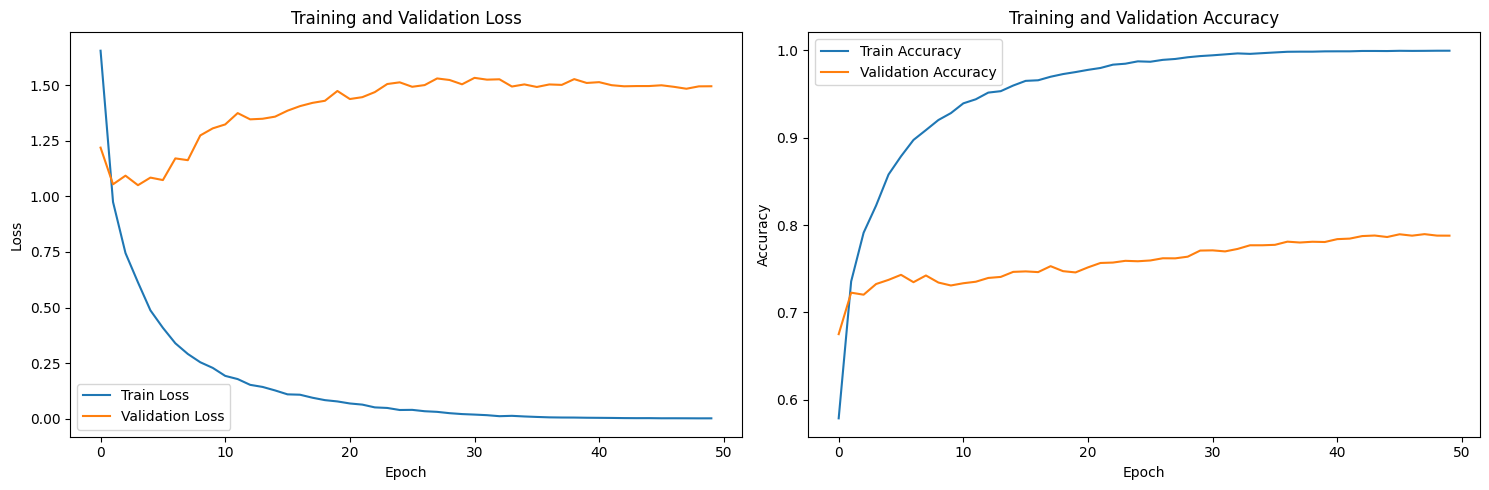

In [21]:
import matplotlib.pyplot as plt
def plot_training_results(results):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(results['train_loss'], label='Train Loss')
    plt.plot(results['valid_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(results['train_acc'], label='Train Accuracy')
    plt.plot(results['valid_acc'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
plot_training_results(results)

#### Demonstration (1 point)

 Покажите качество работы модели, прогнав несколько фотографий через нее

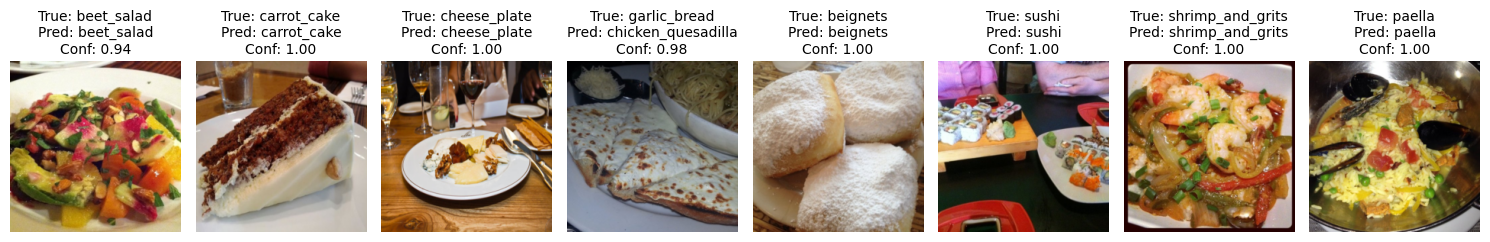

In [ ]:
def visualize_predictions_from_loader(model, test_dataloader, class_names, device='cuda', num_images=8):
    """
    Визуализирует предсказания модели для одного батча из DataLoader
    
    Args:
        model: обученная модель
        test_dataloader: DataLoader с тестовыми данными
        class_names: список имен классов
        device: устройство для вычислений ('cuda' или 'cpu')
        num_images: количество изображений для отображения
    """
    model.eval()
    
    images, labels = next(iter(test_dataloader))
    images = images[:num_images]
    labels = labels[:num_images]
    
    plt.figure(figsize=(15, 5))
    
    with torch.no_grad():
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        probs = torch.nn.functional.softmax(outputs, dim=1)
    
    mean = torch.tensor([0.485, 0.456, 0.406]).view(1, 3, 1, 1).to(images.device)
    std = torch.tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1).to(images.device)
    denorm_images = images * std + mean
    denorm_images = denorm_images.clamp(0, 1).cpu().numpy()
    
    for i in range(min(num_images, len(images))):
        plt.subplot(1, num_images, i+1)
        img = denorm_images[i].transpose(1, 2, 0)
        
        true_label = class_names[labels[i].item()]
        pred_label = class_names[preds[i].item()]
        confidence = probs[i][preds[i]].item()
        
        plt.imshow(img)
        plt.title(f"True: {true_label}\nPred: {pred_label}\nConf: {confidence:.2f}", fontsize=10)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

visualize_predictions_from_loader(model, test_dataloader, class_names, device='cuda')